In [1]:
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os
from natsort import natsorted

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amsmath}', r'\usepackage{amsfonts}',
                                  r'\usepackage{amstext}']}
plt.rcParams.update(params)

psnr_cols         = ["psnr1","psnr2","psnr3"]
recon_cols        = ["recon_error1","recon_error2","recon_error3"]
z_recov_norm_cols = ["z_recov_norm1","z_recov_norm2","z_recov_norm3"]

# CS CelebA: Comparision between GLOW, DCGAN and LASSO


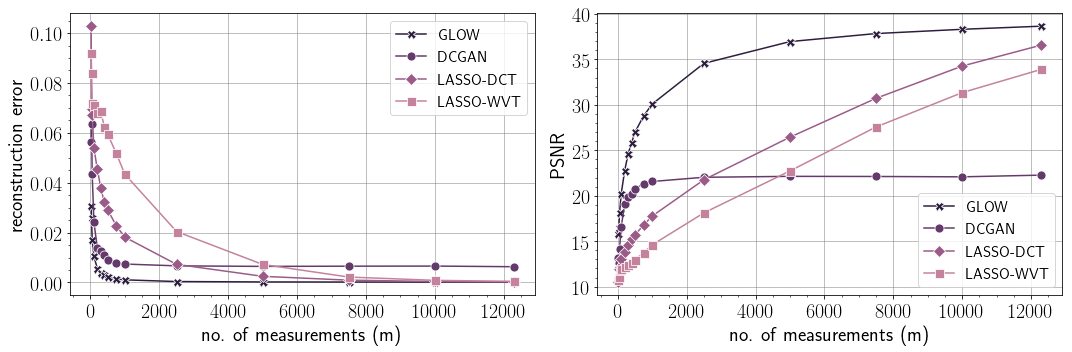

In [2]:
palette = sns.cubehelix_palette(n_colors=4, reverse=True, light=0.6)

df = pd.read_csv("./csv/cs_results.csv")
df["psnr_mean"] = df[psnr_cols].mean(axis=1)
df["recon_mean"] = df[recon_cols].mean(axis=1)
df = df.query("dataset == 'celeba'")
q  = "method == 'glow-main' "
q  = q + "or method == 'dcgan' " 
q  = q + "or method == 'lasso-wavelet' " 
q  = q + "or method == 'lasso-dct' " 
df = df.query(q)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x="m",y="recon_mean",data=df,hue="method",
             style="method",dashes=False,markers=['o','s','D','X'], 
             linewidth=1.5, markersize=9, palette=palette,
             hue_order = ["glow-main","dcgan","lasso-dct","lasso-wavelet"])
plt.xlabel("no. of measurements (m)",size=20)
plt.ylabel("reconstruction error",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.legend(["GLOW","DCGAN","LASSO-DCT", "LASSO-WVT"], fontsize=15)
plt.tight_layout()

plt.subplot(1,2,2)
sns.lineplot(x="m",y="psnr_mean",data=df,hue="method",
             style="method",dashes=False,markers=['o','s','D','X'], 
             linewidth=1.5,  markersize=9,palette=palette,
             hue_order = ["glow-main","dcgan","lasso-dct","lasso-wavelet"])
plt.xlabel("no. of measurements (m)",size=20)
plt.ylabel("PSNR",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.legend(["GLOW","DCGAN","LASSO-DCT", "LASSO-WVT"], fontsize=15)
plt.tight_layout()
plt.show()

# CS CelebA: Comparision between GLOW (LBFGS), GLOW (ADAM), DCGAN and LASSO

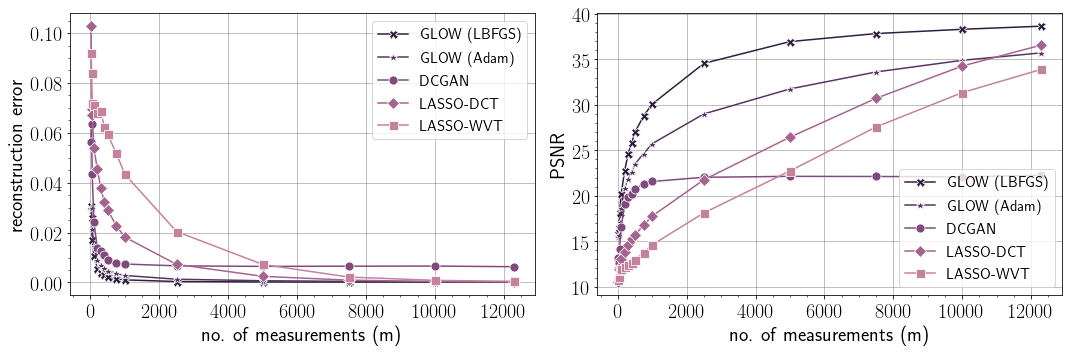

In [3]:
palette = sns.cubehelix_palette(n_colors=5, reverse=True, light=0.6)

df = pd.read_csv("./csv/cs_results.csv")
df["psnr_mean"] = df[psnr_cols].mean(axis=1)
df["recon_mean"] = df[recon_cols].mean(axis=1)
df["recon_std"] = df[recon_cols].std(axis=1)
df = df.query("dataset == 'celeba'")
q = " method == 'glow-main' "
q = q + "or method == 'glow-adam' "
q = q + "or  method == 'dcgan'"
q = q + "or  method == 'lasso-wavelet'"
q = q + "or  method == 'lasso-dct'"
df = df.query(q)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x="m",y="recon_mean",data=df,hue="method",
             style="method",dashes=False,markers=['o','s','D','X',"*"], 
             linewidth=1.5, markersize=9, palette=palette,
             hue_order = ["glow-main","glow-adam","dcgan","lasso-dct","lasso-wavelet"])
plt.xlabel("no. of measurements (m)",size=20)
plt.ylabel("reconstruction error",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
#plt.grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
plt.legend(["GLOW (LBFGS)","GLOW (Adam)","DCGAN","LASSO-DCT", "LASSO-WVT"], fontsize=15)
plt.tight_layout()

plt.subplot(1,2,2)
sns.lineplot(x="m",y="psnr_mean",data=df,hue="method",
             style="method",dashes=False,markers=['o','s','D','X',"*"], 
             linewidth=1.5,  markersize=9,palette=palette,
             hue_order = ["glow-main","glow-adam","dcgan","lasso-dct","lasso-wavelet"])
plt.xlabel("no. of measurements (m)",size=20)
plt.ylabel("PSNR",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.legend(["GLOW (LBFGS)","GLOW (Adam)","DCGAN","LASSO-DCT", "LASSO-WVT"], fontsize=15)
plt.tight_layout()
plt.show()

# CS Birds: Comparision between GLOW and LASSO

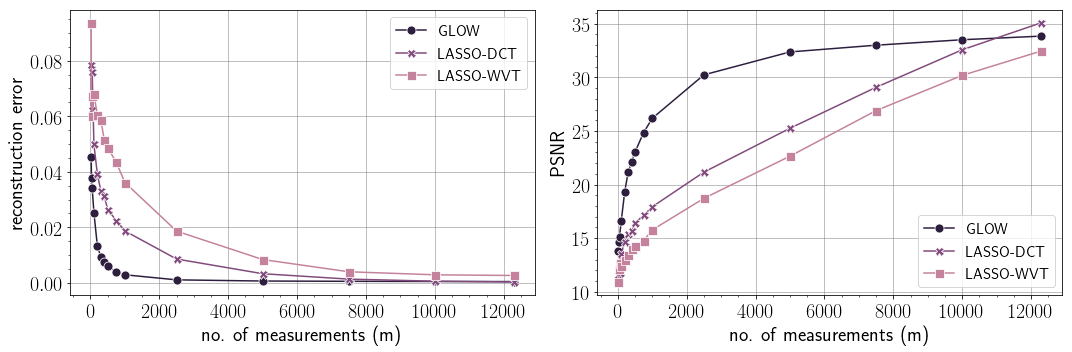

In [4]:
palette = sns.cubehelix_palette(n_colors=3, reverse=True, light=0.6)
df = pd.read_csv("./csv/cs_results.csv")
df["psnr_mean"] = df[psnr_cols].mean(axis=1)
df["recon_mean"] = df[recon_cols].mean(axis=1)
df = df.query("dataset == 'birds'")
q = " method == 'glow-main' "
q = q + "or  method == 'lasso-wavelet'"
q = q + "or  method == 'lasso-dct'"
df = df.query(q)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x="m",y="recon_mean",data=df,hue="method",
             style="method",dashes=False,markers=['o','s','X'], 
             linewidth=1.5, markersize=9, palette=palette,
             hue_order = ["glow-main","lasso-dct","lasso-wavelet"])
plt.xlabel("no. of measurements (m)",size=20)
plt.ylabel("reconstruction error",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.legend(["GLOW","LASSO-DCT", "LASSO-WVT"], fontsize=15)
plt.tight_layout()

plt.subplot(1,2,2)
sns.lineplot(x="m",y="psnr_mean",data=df,hue="method",
             style="method",dashes=False,markers=['o','s','X'], 
             linewidth=1.5,  markersize=9,palette=palette,
             hue_order = ["glow-main","lasso-dct","lasso-wavelet"])
plt.xlabel("no. of measurements (m)",size=20)
plt.ylabel("PSNR",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.legend(["GLOW","LASSO-DCT", "LASSO-WVT"], fontsize=15)
plt.tight_layout()
plt.show()

# CS Flowers: Comparision between GLOW and LASSO

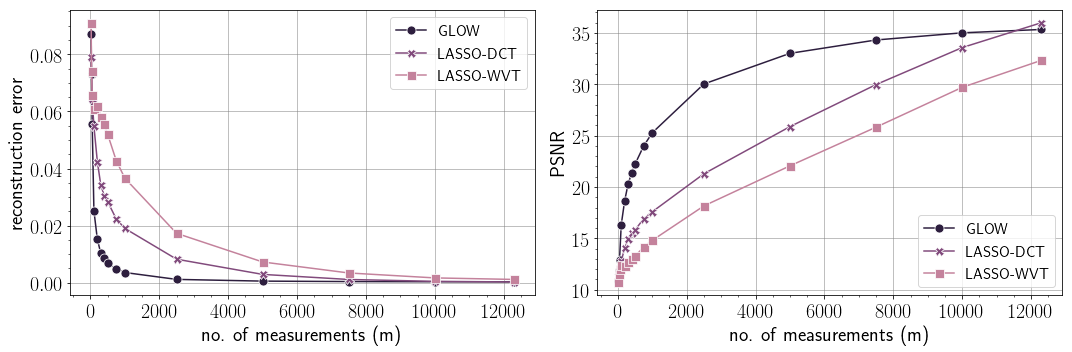

In [5]:
palette = sns.cubehelix_palette(n_colors=3, reverse=True, light=0.6)
df = pd.read_csv("./csv/cs_results.csv")
df["psnr_mean"] = df[psnr_cols].mean(axis=1)
df["recon_mean"] = df[recon_cols].mean(axis=1)
df = df.query("dataset == 'flowers'")
q = " method == 'glow-main' "
q = q + "or  method == 'lasso-wavelet'"
q = q + "or  method == 'lasso-dct'"
df = df.query(q)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x="m",y="recon_mean",data=df,hue="method",
             style="method",dashes=False,markers=['o','s','X'], 
             linewidth=1.5, markersize=9, palette=palette,
             hue_order = ["glow-main","lasso-dct","lasso-wavelet"])
plt.xlabel("no. of measurements (m)",size=20)
plt.ylabel("reconstruction error",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.legend(["GLOW","LASSO-DCT", "LASSO-WVT"], fontsize=15)
plt.tight_layout()

plt.subplot(1,2,2)
sns.lineplot(x="m",y="psnr_mean",data=df,hue="method",
             style="method",dashes=False,markers=['o','s','X'], 
             linewidth=1.5,  markersize=9,palette=palette,
             hue_order = ["glow-main","lasso-dct","lasso-wavelet"])
plt.xlabel("no. of measurements (m)",size=20)
plt.ylabel("PSNR",size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.legend(["GLOW","LASSO-DCT", "LASSO-WVT"], fontsize=15)
plt.tight_layout()
plt.show()

# CS CelebA: ablation study with Gamma

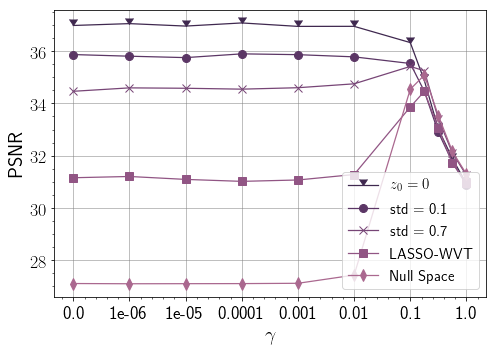

In [6]:
palette = sns.cubehelix_palette(n_colors=5, reverse=True, dark=0.2, light=0.50)
sns.set_palette(palette)

df = pd.read_csv("./csv/cs_results.csv")
df = df.query("dataset == 'celeba'")
df = df.query("method == 'glow-ablation-gamma'")


df["psnr_mean"] = df[psnr_cols].mean(axis=1)
df["recon_mean"] = df[recon_cols].mean(axis=1)

plt.figure(figsize=(7,5))
df0   = df.query("z_init_std == '0'")
gamma = df0.gamma.values
psnr  = df0.psnr_mean.values
gamma_ticks = [0,1,2,3,4,5,6,6.25,6.5,6.75,7]
plt.plot(gamma_ticks, psnr, linewidth=1.25, marker=7, markersize=8)

df1   = df.query("z_init_std == '0.1'")
gamma = df1.gamma.values
psnr  = df1.psnr_mean.values
gamma_ticks = [0,1,2,3,4,5,6,6.25,6.5,6.75,7]
plt.plot(gamma_ticks, psnr, linewidth=1.25, marker="o", markersize=8)

df2   = df.query("z_init_std == '0.7'")
gamma = df2.gamma.values
psnr  = df2.psnr_mean.values
gamma_ticks = [0,1,2,3,4,5,6,6.25,6.5,6.75,7]
plt.plot(gamma_ticks, psnr, linewidth=1.25, marker="x", markersize=8)

df3   = df.query("z_init_std == 'lasso-wavelet'")
gamma = df3.gamma.values
psnr  = df3.psnr_mean.values
gamma_ticks = [0,1,2,3,4,5,6,6.25,6.5,6.75,7]
plt.plot(gamma_ticks, psnr, linewidth=1.25, marker="s", markersize=8)

df4   = df.query("z_init_std == 'null-space-pertnorm-5'")
gamma = df4.gamma.values
psnr  = df4.psnr_mean.values
gamma_ticks = [0,1,2,3,4,5,6,6.25,6.5,6.75,7]
plt.plot(gamma_ticks, psnr, linewidth=1.25, marker="d", markersize=8)

gamma_ticks = [0,1,2,3,4,5,6,7]
gamma       = gamma[[0,1,2,3,4,5,6,10]]
plt.xticks(gamma_ticks,gamma, size=18)
plt.yticks(size=18)
plt.xlabel("$\gamma$", size=20)
plt.ylabel("PSNR", size=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.legend(["$z_0 = 0$", "std = 0.1", "std = 0.7", "LASSO-WVT","Null Space"], 
           fontsize=15, loc=4)
plt.tight_layout()
plt.show()

# CS CelebA: $\|z_0\|$ vs $\|\hat{z}\|$ with PSNR

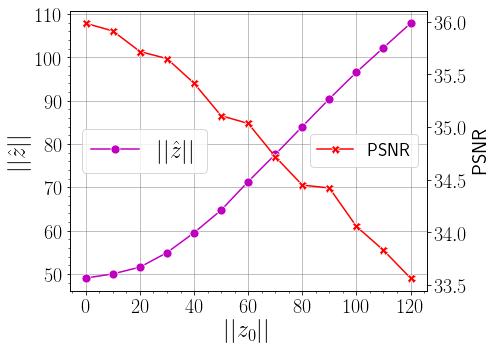

In [7]:
df = pd.read_csv("./csv/cs_z_norm_results.csv")
df = df.query("dataset == 'celeba' & method == 'glow-ablation-z-init-norm'")
df["z_recov_norm_mean"] = df[z_recov_norm_cols].mean(axis=1)
df["psnr_mean"]         = df[psnr_cols].mean(axis=1)

fig, ax = plt.subplots(figsize=(7,5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.lineplot(x="z_init_norm", y="z_recov_norm_mean", data=df, 
             markers=True,marker="o", ax=ax, color="m", markersize=9)
plt.ylabel("$|| \hat{z} ||$",size=24)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.legend(["$|| \hat{z} ||$"],loc=6, fontsize=24)
plt.xlabel("$|| z_{0} ||$",size=24)
sns.lineplot(x="z_init_norm", y="psnr_mean", data=df, 
             markers=True,marker="X", ax=ax.twinx(), color="r", markersize=9)
plt.ylabel("PSNR", size=20)
plt.yticks(fontsize=20)
plt.legend(["PSNR"],loc=7, fontsize=18)
plt.tight_layout()
plt.show()

# Denoising : Analysis with Gamma for DCGAN, GLOW and BM3D in PSNR

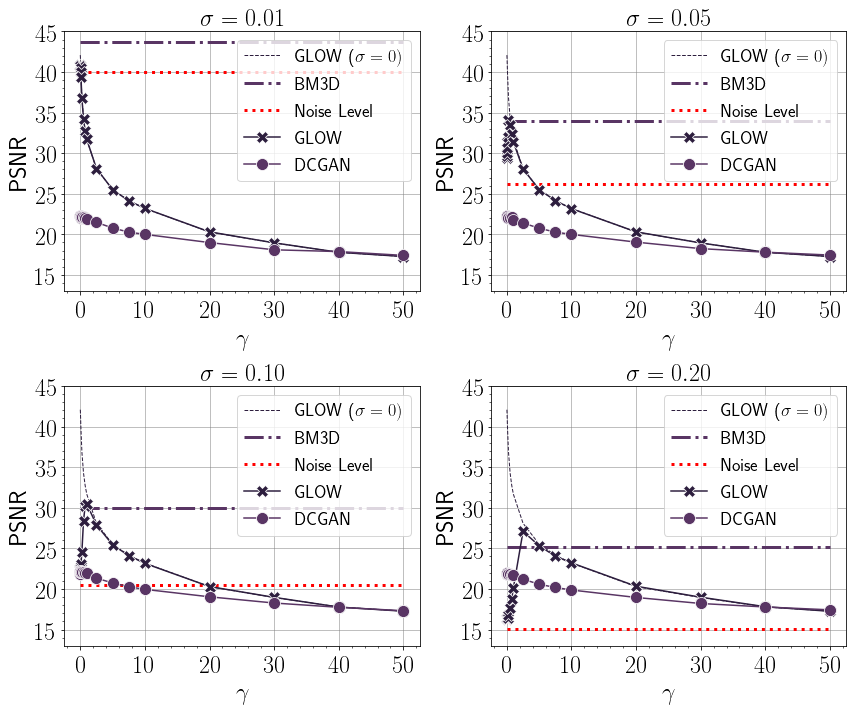

In [8]:
palette = sns.cubehelix_palette(reverse=True, light=0.75)
sns.set_palette(palette)

df_noise = pd.read_csv("./csv/denoising_results.csv")
df_noise["psnr_mean"] = df_noise[psnr_cols].mean(axis=1)
df_noise.query("dataset == 'celeba' ")

plt.figure(figsize=(12,10))
#  -------------------------- NOISE = 0.01 --------------------------
plt.subplot(2,2,1)
# GLOW(sigma=0)
ax = sns.lineplot(x="gamma", y="psnr_mean", data=df_noise.query("noise_std==0.0 and method=='glow'"),
                  markers=False, linewidth=1)
ax.lines[0].set_linestyle("--")
# bm3d
ax = sns.lineplot(x=df_noise.query("method=='glow'").gamma.dropna().unique(),y= df_noise.query("method=='bm3d' and noise_std==0.01").psnr_mean.values.tolist()*18, 
                  markers=False, linewidth=3)
ax.lines[1].set_linestyle("-.")
# noisy psnr
ax = sns.lineplot(x="gamma", y="psnr_noisy", data=df_noise.query("noise_std==0.01 and method=='glow'"),
                  markers=False, linewidth=3, color="r")
ax.lines[-1].set_linestyle(":")
# glow, dcgan
sns.lineplot(x="gamma", y="psnr_mean", data=df_noise.query("noise_std==0.01 and (method == 'glow' or method == 'dcgan')"),
             markers=["X","o"], hue="method", style="method", dashes=False, markersize=12,
             hue_order=["glow", "dcgan"])

plt.legend(["GLOW ($\sigma=0)$", "BM3D", "Noise Level", "GLOW", "DCGAN"], fontsize=18, loc=1)
plt.xlabel("$\gamma$", size=24)
plt.ylabel("PSNR", size=24)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
#plt.grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
plt.title("$\sigma = 0.01$", size=24)
plt.ylim(13,45)
plt.xticks(size=24)
plt.yticks(size=24)
plt.tight_layout()


# ---------------------- NOISE = 0.05 -----------------------------------------
plt.subplot(2,2,2)
# GLOW(sigma=0)
ax = sns.lineplot(x="gamma", y="psnr_mean", data=df_noise.query("noise_std==0.0 and method=='glow'"),
                  markers=False, linewidth=1)
ax.lines[0].set_linestyle("--")
# bm3d
ax = sns.lineplot(x=df_noise.query("method=='glow'").gamma.dropna().unique(),y= df_noise.query("method=='bm3d' and noise_std==0.05").psnr_mean.values.tolist()*18, 
                  markers=False, linewidth=3)
ax.lines[1].set_linestyle("-.")
# noisy psnr
ax = sns.lineplot(x="gamma", y="psnr_noisy", data=df_noise.query("noise_std==0.05 and method=='glow'"),
                  markers=False, linewidth=3, color="r")
ax.lines[-1].set_linestyle(":")
# glow, dcgan
sns.lineplot(x="gamma", y="psnr_mean", data=df_noise.query("noise_std==0.05 and (method == 'glow' or method == 'dcgan')"),
             markers=["X","o"], marker="o",hue="method",style="method",dashes=False,markersize=12,
             hue_order=["glow", "dcgan"])

plt.legend(["GLOW ($\sigma=0)$", "BM3D", "Noise Level", "GLOW", "DCGAN"], fontsize=18, loc=1)
plt.xlabel("$\gamma$", size=24)
plt.ylabel("PSNR", size=24)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
#plt.grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
plt.title("$\sigma = 0.05$", size=24)
plt.ylim(13,45)
plt.xticks(size=24)
plt.yticks(size=24)
plt.tight_layout()



# ------------------------------NOISE = 0.10 ----------------------------
plt.subplot(2,2,3)
# GLOW(sigma=0)
ax = sns.lineplot(x="gamma", y="psnr_mean", data=df_noise.query("noise_std==0.0 and method=='glow'"),
                  markers=False, linewidth=1)
ax.lines[0].set_linestyle("--")
# bm3d
ax = sns.lineplot(x=df_noise.query("method=='glow'").gamma.dropna().unique(),y= df_noise.query("method=='bm3d' and noise_std==0.10").psnr_mean.values.tolist()*18, 
                  markers=False, linewidth=3)
ax.lines[1].set_linestyle("-.")
# noisy psnr
ax = sns.lineplot(x="gamma", y="psnr_noisy", data=df_noise.query("noise_std==0.10 and method=='glow'"),
                  markers=False, linewidth=3, color="r")
ax.lines[-1].set_linestyle(":")
# glow, dcgan
sns.lineplot(x="gamma", y="psnr_mean", data=df_noise.query("noise_std==0.10 and (method == 'glow' or method == 'dcgan')"),
             markers=["X","o"], marker="o",hue="method",style="method",dashes=False,markersize=12,
             hue_order=["glow", "dcgan"])

plt.legend(["GLOW ($\sigma=0)$", "BM3D", "Noise Level", "GLOW", "DCGAN"], fontsize=18, loc=1)
plt.xlabel("$\gamma$", size=24)
plt.ylabel("PSNR", size=24)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
#plt.grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
plt.title("$\sigma = 0.10$", size=24)
plt.ylim(13,45)
plt.xticks(size=24)
plt.yticks(size=24)
plt.tight_layout()


# ----------------------------------- NOISE = 0.20 --------------------------------------
plt.subplot(2,2,4)
# GLOW(sigma=0)
ax = sns.lineplot(x="gamma", y="psnr_mean", data=df_noise.query("noise_std==0.0 and method=='glow'"),
                  markers=False, linewidth=1)
ax.lines[0].set_linestyle("--")
# bm3d
ax = sns.lineplot(x=df_noise.query("method=='glow'").gamma.dropna().unique(),y= df_noise.query("method=='bm3d' and noise_std==0.20").psnr_mean.values.tolist()*18, 
                  markers=False, linewidth=3)
ax.lines[1].set_linestyle("-.")
# noisy psnr
ax = sns.lineplot(x="gamma", y="psnr_noisy", data=df_noise.query("noise_std==0.20 and method=='glow'"),
                  markers=False, linewidth=3, color="r")
ax.lines[-1].set_linestyle(":")
# glow, dcgan
sns.lineplot(x="gamma", y="psnr_mean", data=df_noise.query("noise_std==0.20 and (method == 'glow' or method == 'dcgan')"),
             markers=["X","o"], marker="o",hue="method",style="method",dashes=False,markersize=12,
             hue_order=["glow", "dcgan"])

plt.legend(["GLOW ($\sigma=0)$", "BM3D", "Noise Level", "GLOW", "DCGAN"], fontsize=18, loc=1)
plt.xlabel("$\gamma$", size=24)
plt.ylabel("PSNR", size=24)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
#plt.grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
plt.title("$\sigma = 0.20$", size=24)
plt.ylim(13,45)
plt.xticks(size=24)
plt.yticks(size=24)
plt.tight_layout()
plt.show()


# Denoising : Analysis with Gamma for GLOW with $\|z\|^2$ and $\|z\|$

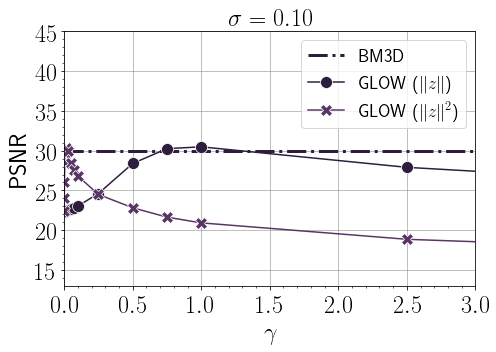

In [9]:
palette = sns.cubehelix_palette(reverse=True, light=0.75)
sns.set_palette(palette)

df_noise = pd.read_csv("./csv/denoising_results.csv")
df_noise["psnr_mean"] = df_noise[psnr_cols].mean(axis=1)
df_noise = df_noise.query("dataset == 'celeba'")
df_noise = df_noise.query("method == 'glow' or method == 'glow-z-squared' or method == 'bm3d'")

# -------------------------- NOISE = 0.10 ----------------------------
plt.figure(figsize=(7,5))
# bm3d
ax = sns.lineplot(x=df_noise.query("method == 'glow'").gamma.dropna().unique(),
                  y= df_noise.query("method=='bm3d' and noise_std==0.1").psnr_mean.values.tolist()*18, 
                  markers=False, linewidth=3)
ax.lines[0].set_linestyle("-.")
# glow, glow-z-squared
sns.lineplot(x="gamma", y="psnr_mean", data=df_noise.query("noise_std==0.1 and (method == 'glow' or method == 'glow-z-squared')"),
             markers=True, marker="o",hue="method",style="method",dashes=False,markersize=12,
             hue_order=["glow", "glow-z-squared"])

plt.legend([#"GLOW ($\sigma=0)$", 
            "BM3D", #"Noise Level", 
            "GLOW ($\|z\|$)", "GLOW  ($\|z\|^2$)"], fontsize=18, loc=1)
#ax.set_xscale('log')
plt.xlabel("$\gamma$", size=24)
plt.ylabel("PSNR", size=24)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.title("$\sigma = 0.10$", size=24)
plt.ylim(13,45)
plt.xlim(0,3)
plt.xticks(size=24)
plt.yticks(size=24)
plt.tight_layout()
plt.show()

# Inpainting CelebA: PSNR with Gamma for GLOW, and  DCGAN

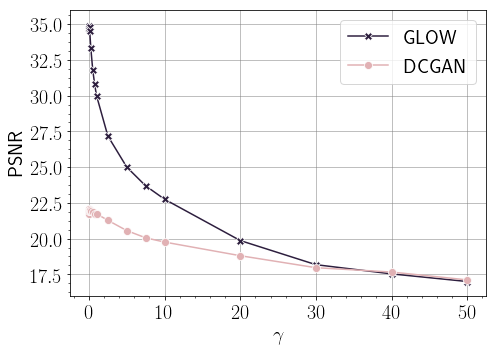

In [10]:
palette = sns.cubehelix_palette(n_colors=2, reverse=True, light=0.75)
sns.set_palette(palette)

df = pd.read_csv("./csv/inpainting_results.csv")
df["psnr_mean"]  = df[psnr_cols].mean(axis=1)

plt.figure(figsize=(7,5))
sns.lineplot(x="gamma", y="psnr_mean", data=df.query("method == 'glow-main' or method=='dcgan'"), 
             hue="method", style="method",markers=["X","o"], palette=palette,
             hue_order = ["glow-main", "dcgan"],dashes=False,
             markersize=8, linewidth=1.5)
plt.ylim([16,36])
plt.xlabel("$\gamma$", size=20)
plt.ylabel("PSNR", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.legend(["GLOW", "DCGAN"], fontsize=20, loc=1)
plt.tight_layout()
plt.show()

# Inpainting CelebA: PSNR with Gamma for Different Initialization

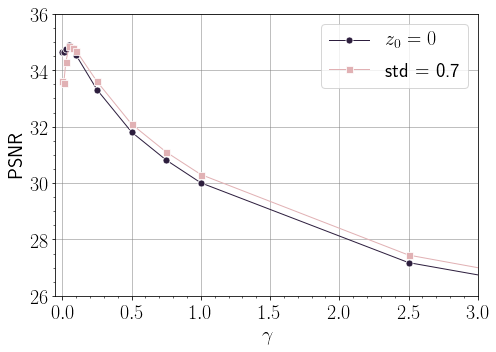

In [11]:
palette = sns.cubehelix_palette(n_colors=2, reverse=True, light=0.75)

df = pd.read_csv("./csv/inpainting_results.csv")
df["psnr_mean"]  = df[psnr_cols].mean(axis=1)
df               = df.query("method != 'dcgan'")
df               = df.query("z_init_std == '0' or z_init_std == '0.7'")

plt.figure(figsize=(7,5))
sns.lineplot(x="gamma", y="psnr_mean", data=df, 
             hue="z_init_std", style="z_init_std",markers=["o","s"],dashes=False,
             linewidth=1, palette=palette,markersize=7)
plt.xlim([-0.05,3])
plt.ylim([26,36])
plt.xlabel("$\gamma$", size=20)
plt.ylabel("PSNR", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.legend(["$z_0 = 0$", "std = 0.7"],fontsize=20)
plt.tight_layout()
plt.show()

# Dx-Dz curve in natural and random directions from Saved

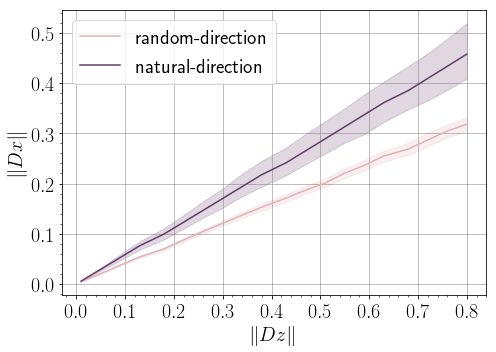

In [12]:
palette = sns.cubehelix_palette(n_colors=2, reverse=False, dark=0.3, light=0.75)

df_random  = pd.read_csv("./csv/dx_dz_random_direction.csv")
df_natural = pd.read_csv("./csv/dx_dz_natural_direction.csv")
df         = pd.concat([df_random, df_natural], axis=0, sort=False)

plt.figure(figsize=(7,5))
sns.lineplot(x="Dz",y="Dx", data=df, hue="method",palette=palette,
             err_style = "band")
plt.legend(["random-direction","natural-direction"],fontsize=20)
plt.xlabel("$\| Dz \|$", size=20)
plt.ylabel("$\| Dx \|$", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.tight_layout()
plt.show()

# Loading Glow model for Further Plots

In [2]:
import sys
import json
import torch
sys.path.append('..')
from glow.glow import Glow
from tqdm import tqdm
from torchvision import datasets
import torchvision.transforms as transforms

# constants
size = 64
n = size*size*3
test_folder = "../data/celeba_preprocessed/validation"
batch_size  = 100
# loading dataset
trans            = transforms.Compose([transforms.Resize((size,size)),transforms.ToTensor()])
test_dataset     = datasets.ImageFolder(test_folder, transform=trans)
test_dataloader  = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,drop_last=False,shuffle=False)

# loading glow model
config_path = "../trained_models/celeba/glow/configs.json"
with open(config_path, 'r') as f:
    configs = json.load(f)
weights_path =  "../trained_models/celeba/glow/glowmodel.pt"
glow = Glow((3,64,64),
            K=configs["K"],L=configs["L"],
            coupling=configs["coupling"],
            n_bits_x=configs["n_bits_x"],
            nn_init_last_zeros=configs["last_zeros"],
            device="cuda")
glow.load_state_dict(torch.load(weights_path))
_ = glow.eval()

# Distribution of $\|z\|$ for Noisy & Clean

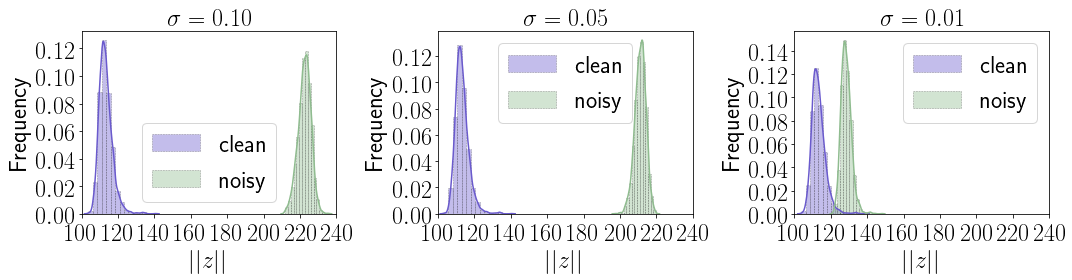

In [14]:
from plot_utils import histZNoisy
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
histZNoisy(noise_std=0.10,max_images=None,
           glow = glow,
           dataloader = test_dataloader,
           batch_size = batch_size,
           size = size)
plt.subplot(1,3,2)
histZNoisy(noise_std=0.05,max_images=None,
           glow = glow,
           dataloader = test_dataloader,
           batch_size = batch_size,
           size = size)
plt.subplot(1,3,3)
histZNoisy(noise_std=0.01,max_images=None,
           glow = glow,
           dataloader = test_dataloader,
           batch_size = batch_size,
           size = size)
plt.show()

# Dx-Dz Plot for Natural & Random Directions

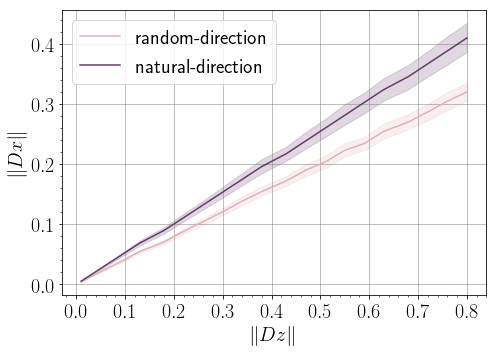

In [15]:
from plot_utils import getDxDzNaturalDirection,getDxDzRandomDirection
palette = sns.cubehelix_palette(n_colors=2, reverse=False, dark=0.3, light=0.75)

len_dz    = np.linspace(0.01,0.8,20) 
n_rand_directions  = 10

dfNatural = getDxDzNaturalDirection(len_dz, glow, 
                        test_dataloader, size, 
                        max_images = 100,
                        batch_size = batch_size)
dfRandom  = getDxDzRandomDirection(len_dz,n_rand_directions, glow, 
                        test_dataloader, size, 
                        max_images=100,
                        batch_size =batch_size)

df         = pd.concat([dfRandom, dfNatural], axis=0, sort=False)
plt.figure(figsize=(7,5))
sns.lineplot(x="Dz",y="Dx", data=df, hue="method",palette=palette,
             err_style = "band")
plt.legend(["random-direction","natural-direction"],fontsize=20)
plt.xlabel("$\| Dz \|$", size=20)
plt.ylabel("$\| Dx \|$", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.tight_layout()
plt.show()

# Glow Loss Landscape for Random Directions

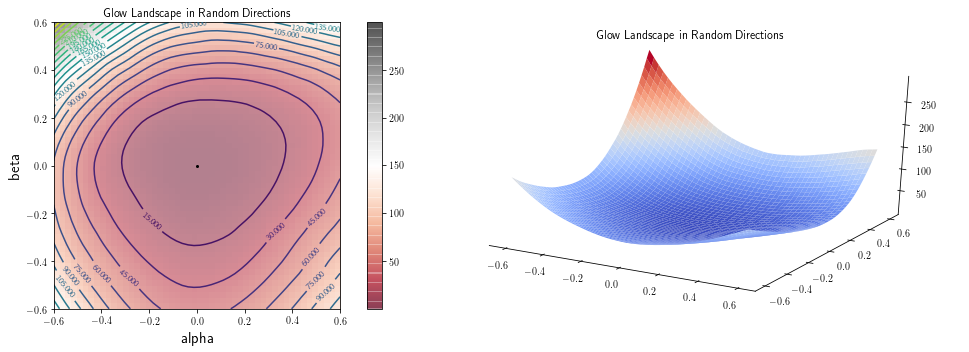

In [16]:
from plot_utils import glowLandscapeRandomDirection
test_folder = "../test_images/celeba/"
trans            = transforms.Compose([transforms.Resize((size,size)),transforms.ToTensor()])
test_dataset     = datasets.ImageFolder(test_folder, transform=trans)
test_dataloader  = torch.utils.data.DataLoader(test_dataset,batch_size=1,drop_last=False,shuffle=False)
glowLandscapeRandomDirection(which_image=2,m=5000, glow=glow, dataloader=test_dataloader, n_grid=50)

# Glow Loss Landscape for Natural Directions

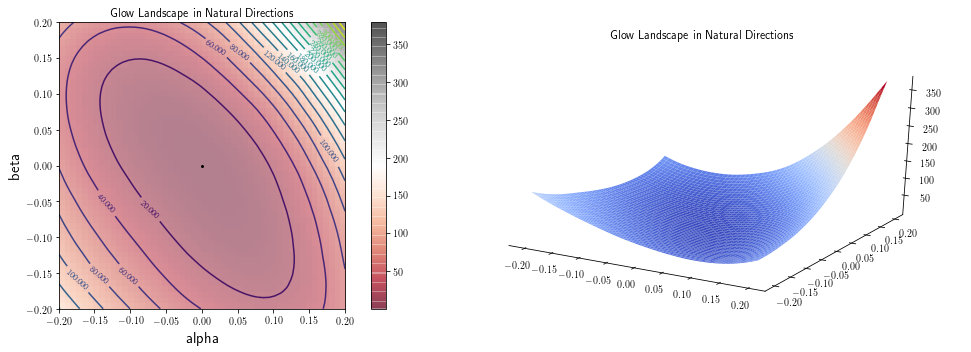

In [17]:
from plot_utils import glowLandscapeNaturalDirection
test_folder = "../test_images/celeba/"
trans            = transforms.Compose([transforms.Resize((size,size)),transforms.ToTensor()])
test_dataset     = datasets.ImageFolder(test_folder, transform=trans)
test_dataloader  = torch.utils.data.DataLoader(test_dataset,batch_size=1,drop_last=False,shuffle=False)
glowLandscapeNaturalDirection(which_image=2,m=5000, glow=glow, dataloader=test_dataloader, n_grid=50)

# DCGAN Loss Landscape

In [18]:
from dcgan.dcgan import Generator
generator = Generator(ngpu=1).cuda()
generator.load_state_dict(torch.load("../trained_models/celeba/dcgan/dcgan_G.pt"))
_ = generator.eval()

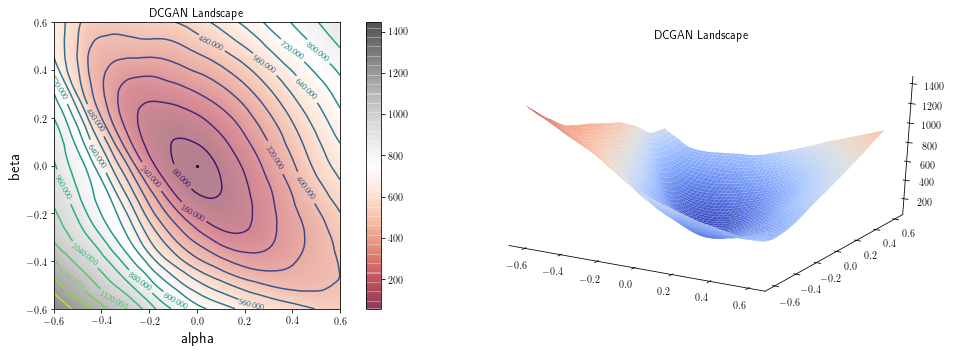

In [19]:
from plot_utils import dcganLossLandscape
test_folder = "../test_images/celeba/"
trans            = transforms.Compose([transforms.Resize((size,size)),transforms.ToTensor()])
test_dataset     = datasets.ImageFolder(test_folder, transform=trans)
test_dataloader  = torch.utils.data.DataLoader(test_dataset,batch_size=1,drop_last=False,shuffle=False)
dcganLossLandscape(which_image=2,m=5000, generator=generator, dataloader=test_dataloader, n_grid=200)